<a href="https://colab.research.google.com/github/Kranthi98/Udemy-python-ML/blob/master/lectures/07_may_Udemy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Convolutional neural layer
##1.Convolutional layer
####Divide the image into filters and kernels to get small details
##2.pooling layer
####choosing the max or avg of few pixels
##3.dense full layer
##Layer parameter
####called as hyper parameters..and are determined empirically
####1.Convolution layer : kernel size,no of filters, padding, strides, 
####2.pooling layers : pooling size

In [0]:
model = Sequential()

NameError: ignored

#####dropout layer helps in regularisato=ion


In [0]:
#preparing the CNN model
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
import random

Using TensorFlow backend.


In [0]:
#image dimensions
img_rows , img_cols = 28,28
#batch size - no of training samples for a batch 
batch_size = 128
#no of classes output as 10 diff output
num_class = 10
#no of times a model can be trained more the models more better it will get
epochs = 5
#dropout is a regularisaton parameter for reducing the over fitting
dropout = 0.5


In [0]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
orig_test = x_test
if K.image_data_format == "channels first":
  x_train = x_train.reshape(x_train.shape[0],3,img_rows,img_cols)
  x_test = x_test.reshape(x_test.shape[0],3,img_rows,img_cols)
  input_shape = (3,img_rows,img_cols)
else:
  x_train = x_train.reshape(x_train.shape[0],img_rows,img_cols,3)
  x_test = x_test.reshape(x_test.shape[0],img_rows,img_cols,3)
  input_shape = (img_rows,img_cols,3)
  
x_train,x_test = x_train/255.0 , x_test/255.0
print(x_train.shape[0],"train samples")
print(x_test.shape[0],"test samples")

NameError: ignored

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
x_train.shape[0]

60000

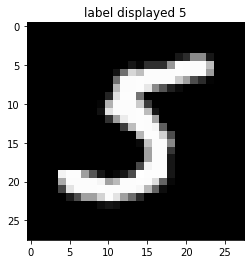

In [0]:
ind = random.randrange(10000)
plt.imshow(orig_test[ind],cmap = "gray")
plt.title("label displayed %d" %y_test[ind])
plt.show()

In [0]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape = input_shape))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(dropout/2))
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dropout(dropout))
model.add(Dense(num_class,activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [0]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["acc"])
hist = model.fit(x_train,y_train,verbose=1,epochs=epochs,batch_size=batch_size,validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 9s 158us/step - loss: 0.2459 - acc: 0.9253 - val_loss: 0.0560 - val_acc: 0.9822
Epoch 2/5
60000/60000 [==============================] - 3s 55us/step - loss: 0.0898 - acc: 0.9736 - val_loss: 0.0415 - val_acc: 0.9868
Epoch 3/5
60000/60000 [==============================] - 3s 55us/step - loss: 0.0675 - acc: 0.9797 - val_loss: 0.0328 - val_acc: 0.9888
Epoch 4/5
60000/60000 [==============================] - 3s 53us/step - loss: 0.0528 - acc: 0.9835 - val_loss: 0.0320 - val_acc: 0.9893
Epoch 5/5
60000/60000 [==============================] - 3s 53us/step - loss: 0.0479 - acc: 0.9854 - val_loss: 0.0326 - val_acc: 0.9886


In [0]:
score = model.evaluate(x_test,y_test,verbose = 0)
print("test loss",score[0])
print("test accuracy",score[1])

test loss 0.032584274092238776
test accuracy 0.9886000156402588


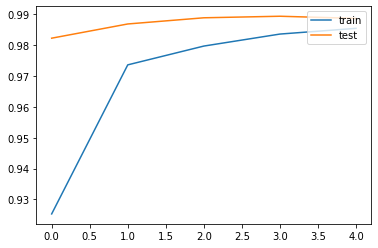

In [0]:
plt.plot(hist.history["acc"])
plt.plot(hist.history["val_acc"])
plt.legend(("train","test"),loc = "upper right")
plt.show()

In [0]:
predictions = model.predict(x_test)

In [0]:
most_likely = predictions.argmax(1)

In [0]:
len(predictions)


10000

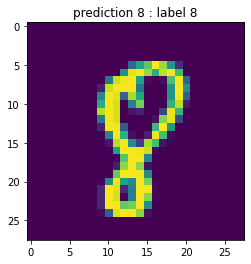

In [0]:
index = random.randrange(1000)
plt.title('prediction %d : label %d' %(most_likely[index],y_test[index]))
plt.imshow(orig_test[index])
plt.show()

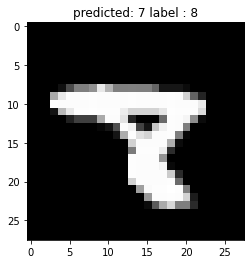

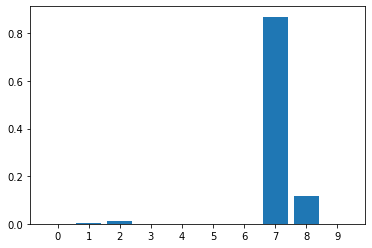

In [0]:
for i in range(10000):
  index = random.randrange(10000)
  if most_likely[index] != y_test[index]:
    break

plt.imshow(orig_test[index],cmap="gray")
plt.title("predicted: %d label : %d" %(most_likely[index],y_test[index]))
plt.show()
plt.bar(range(10),predictions[index],tick_label= range(10))
plt.show()